### **GITHUB** **CONNECTION**

In [1]:
!git clone https://github.com/Donerne/6100-Project-Two.git

Cloning into '6100-Project-Two'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
Receiving objects: 100% (6/6), done.
Resolving deltas: 100% (1/1), done.
remote: Total 6 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)


### **IMPORT DEPENDENCIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **DATA PREPROCESSING**

In [6]:
#Mount Google Drive in Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Upload the datasets
from google.colab import files
uploaded = files.upload()


Saving Project2_Test.xlsx to Project2_Test.xlsx
Saving Project2_Training.xlsx to Project2_Training.xlsx


In [2]:
# Load the datasets
full_df= pd.read_excel("full_data.xlsx")

In [3]:
# Display the first few rows of each dataset
print("Full Data:")
print(full_df.head())

Full Data:
   QUOTEDATE  VEHICLEYEAR          VEHICLEMAKE  \
0 2016-01-02         2006           VOLKSWAGEN   
1 2016-01-02         2017              HYUNDAI   
2 2016-01-02         2015  CHEVROLET TRUCK/VAN   
3 2016-01-02         2010               TOYOTA   
4 2016-01-04         2013                HONDA   

                        VEHICLEMODEL  ANNUAL_KM  COMMUTE_DISTANCE  \
0                       JETTA 2.5 4P    10000.0               NaN   
1                     ELANTRA GL 4DR    20000.0               NaN   
2  SILVERADO 2500 HD LT CREW CAB 4WD    15000.0               NaN   
3                     COROLLA CE 4DR    20000.0              20.0   
4                       CIVIC LX 4DR    30000.0              30.0   

  MARKING_SYSTEM TRACKING_SYSTEM VEHICLE_OWNERSHIP  VEHICLE_VALUE  ...  \
0            NaN             NaN             Owned         3000.0  ...   
1            NaN             NaN             Owned            1.0  ...   
2            NaN             NaN               NaN 

In [4]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117005 entries, 0 to 117004
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   QUOTEDATE                       117005 non-null  datetime64[ns]
 1   VEHICLEYEAR                     117005 non-null  int64         
 2   VEHICLEMAKE                     117005 non-null  object        
 3   VEHICLEMODEL                    117005 non-null  object        
 4   ANNUAL_KM                       117004 non-null  float64       
 5   COMMUTE_DISTANCE                76401 non-null   float64       
 6   MARKING_SYSTEM                  44 non-null      object        
 7   TRACKING_SYSTEM                 6 non-null       object        
 8   VEHICLE_OWNERSHIP               29055 non-null   object        
 9   VEHICLE_VALUE                   42173 non-null   float64       
 10  VEHICLEUSE                      117005 non-null  object 

In [5]:
# Converting The response variable to a category
full_df['IS_BOUND'] = full_df['IS_BOUND'].astype('category') 

In [6]:
full_df.describe()

,QUOTEDATE,VEHICLEYEAR,ANNUAL_KM,COMMUTE_DISTANCE,VEHICLE_VALUE,YEAR_OF_BIRTH,YEARS_LICENSED,YEARS_AS_PRINCIPAL_DRIVER,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT
count,117005,117005.000000,117004.000000,76401.000000,42173.000000,117005.000000,116994.000000,780.000000,117005.000000,117005.000000,117005.000000,117005.000000,117005.000000
mean,2016-08-04 01:40:19.681210368,2008.972258,14902.283700,44.856415,20756.987006,2001.577762,20.734294,12.182051,0.164301,0.003572,0.005983,0.058220,0.007162
min,2016-01-02 00:00:00,1930.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-05-04 00:00:00,2006.000000,10000.000000,7.000000,5000.000000,1962.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016-07-28 00:00:00,2010.000000,15000.000000,10.000000,20000.000000,1975.000000,17.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016-10-31 00:00:00,2014.000000,20000.000000,16.000000,30000.000000,1988.000000,33.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2017-02-27 00:00:00,2019.000000,500000.000000,98000.000000,800000.000000,9999.000000,135.000000,50.000000,16.000000,9.000000,4.000000,4.000000,6.000000
std,NaN,5.811886,8515.262146,783.395251,19271.775195,472.782821,16.236036,10.825026,0.520046,0.069583,0.085023,0.243394,0.104102


#### Checking For Duplicates

In [7]:
# Check for duplicates in the training dataset
full_duplicates = full_df.duplicated()
print("Duplicate rows in training data:")
print(full_duplicates.value_counts())

Duplicate rows in training data:
False    116945
True         60
Name: count, dtype: int64


OUTPUT INTERPRETATION

There are 60 duplicated rows in the training dataframe and 116,945 unique rows.

In [8]:
full_duplicates_rows = full_df[full_df.duplicated(keep=False)]

full_duplicates_rows

,QUOTEDATE,VEHICLEYEAR,VEHICLEMAKE,VEHICLEMODEL,ANNUAL_KM,COMMUTE_DISTANCE,MARKING_SYSTEM,TRACKING_SYSTEM,VEHICLE_OWNERSHIP,VEHICLE_VALUE,...,YEARS_AS_PRINCIPAL_DRIVER,MULTI_PRODUCT,MARITAL_STATUS,OCCUPATION,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT,IS_BOUND
28669,2016-05-03,2008,TOYOTA,MATRIX WAGON,20000.0,20.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,0.0
28675,2016-05-03,2008,TOYOTA,MATRIX WAGON,20000.0,20.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,0.0
67509,2016-08-25,2012,HONDA,CIVIC LX 4DR,20000.0,10.0,NaN,NaN,NaN,4000.0,...,NaN,No,Single,Not Known,0,0,0,0,0,0.0
67514,2016-08-25,2012,HONDA,CIVIC LX 4DR,20000.0,10.0,NaN,NaN,NaN,4000.0,...,NaN,No,Single,Not Known,0,0,0,0,0,0.0
79993,2016-10-03,2009,GMC TRUCK/VAN,SIERRA 1500 WT REG CAB 4WD,20000.0,16.0,NaN,NaN,NaN,NaN,...,NaN,No,Married,Farm/Fisher,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116143,2017-02-08,2015,SUBARU,OUTBACK 3.6R WAGON AWD,10000.0,NaN,NaN,NaN,Owned,NaN,...,NaN,Yes,Married,Not Known,0,0,0,0,0,NaN
116174,2017-02-22,2007,TOYOTA,YARIS LE 4DR HATCHBACK,15000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,No,Married,Not Known,0,0,0,0,0,NaN
116382,2017-01-19,2016,HONDA,CIVIC EX 4DR,20000.0,10.0,NaN,NaN,NaN,NaN,...,NaN,No,Single,Not Known,0,0,0,0,0,NaN
116418,2017-02-01,2004,FORD TRUCK/VAN,F150 STX SUPERCAB 4WD,10000.0,1.0,NaN,NaN,NaN,6000.0,...,NaN,Yes,Single,Not Known,1,0,0,0,0,NaN


In [9]:
# Removing Duplicates on Training & Test Datasets
full_df.drop_duplicates(inplace=True)

print('Duplicates on full data removed. Number of rows remaining:', full_df.shape[0])

Duplicates on full data removed. Number of rows remaining: 116945


In [10]:
# Function to obtain percentages of missing values 
def percent_missing(df):
    nan_percent = 100 * df.isnull().sum() / len(df)
    nan_percent = nan_percent[nan_percent > 0].sort_values()

    return nan_percent

# Function to plot out missing value percentages by column
def show_percent_missing(df):
    nan_percent = percent_missing(df)

    sns.barplot(x=nan_percent.index, y=nan_percent)
    plt.xticks(rotation=90)
    plt.ylabel('Missing Percentage %')
    plt.xlabel('Variables')

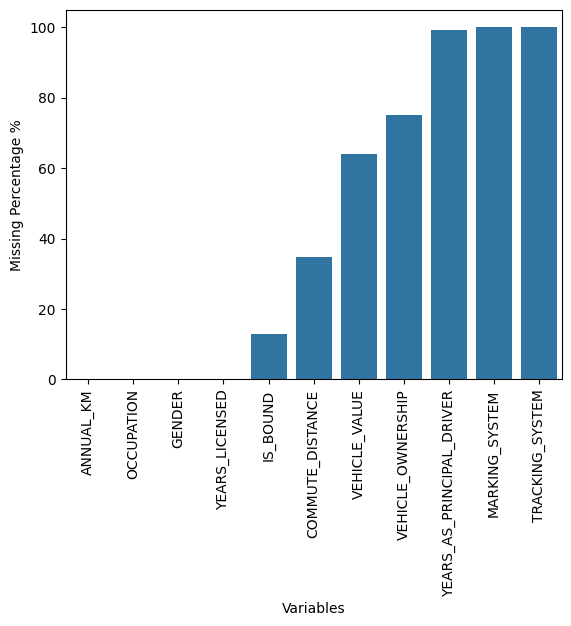

In [11]:
show_percent_missing(full_df)

Over 80% of values missing for 'years as principal driver', 'marking system' and 'tracking system'. These variables will be dropped and the remaining columns with missing values will be handled on a case by case situation

In [12]:
# Dropping Columns With Missing Values Over 80% on training data
full_df.drop(columns=['YEARS_AS_PRINCIPAL_DRIVER', 'MARKING_SYSTEM','TRACKING_SYSTEM'], axis =1, inplace=True)
full_df.head()

,QUOTEDATE,VEHICLEYEAR,VEHICLEMAKE,VEHICLEMODEL,ANNUAL_KM,COMMUTE_DISTANCE,VEHICLE_OWNERSHIP,VEHICLE_VALUE,VEHICLEUSE,GENDER,...,YEARS_LICENSED,MULTI_PRODUCT,MARITAL_STATUS,OCCUPATION,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT,IS_BOUND
0,2016-01-02,2006,VOLKSWAGEN,JETTA 2.5 4P,10000.0,NaN,Owned,3000.0,Pleasure,Male,...,25.0,No,Married,Trades,0,0,0,0,0,0.0
1,2016-01-02,2017,HYUNDAI,ELANTRA GL 4DR,20000.0,NaN,Owned,1.0,Business,Male,...,10.0,No,Married,Not Known,0,0,0,0,0,0.0
2,2016-01-02,2015,CHEVROLET TRUCK/VAN,SILVERADO 2500 HD LT CREW CAB 4WD,15000.0,NaN,NaN,NaN,Pleasure,Male,...,39.0,No,Single,Not Known,0,0,0,0,0,0.0
3,2016-01-02,2010,TOYOTA,COROLLA CE 4DR,20000.0,20.0,NaN,NaN,Commute,Male,...,3.0,Yes,Single,Not Known,0,0,0,0,0,0.0
4,2016-01-04,2013,HONDA,CIVIC LX 4DR,30000.0,30.0,NaN,NaN,Commute,Male,...,2.0,Yes,Single,Not Known,0,0,0,0,0,0.0


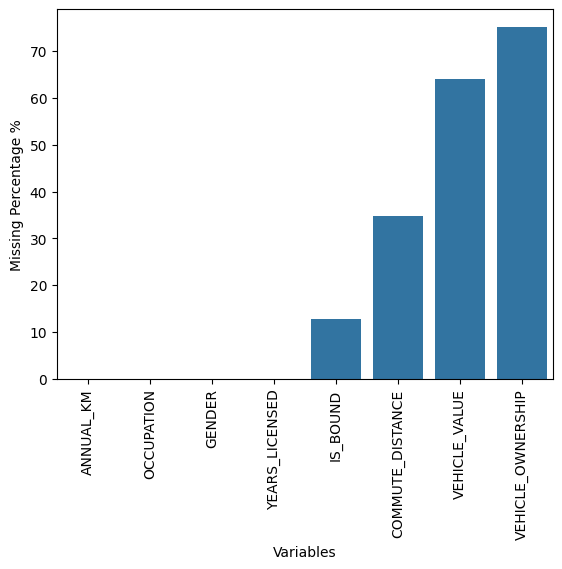

In [13]:
show_percent_missing(full_df)

(0.0, 0.03)

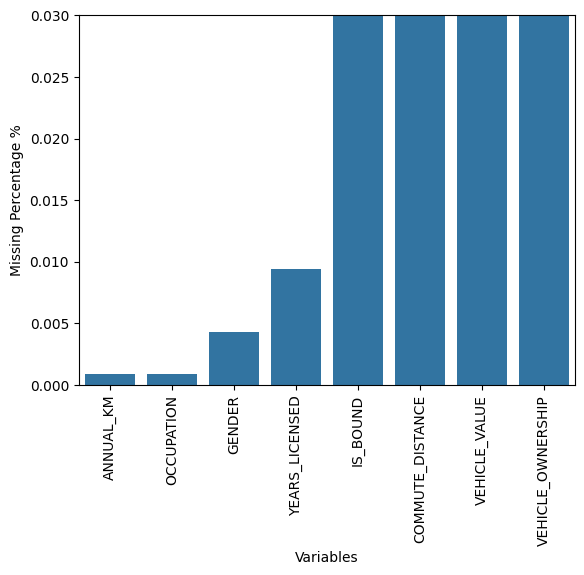

In [14]:
nan_percent = percent_missing(full_df)

sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)
plt.ylabel('Missing Percentage %')
plt.xlabel('Variables')
plt.ylim(0,0.03)

Before I proceed to fill in values for the remaning variables with missing data, I will check 'abnormal' values in the variables

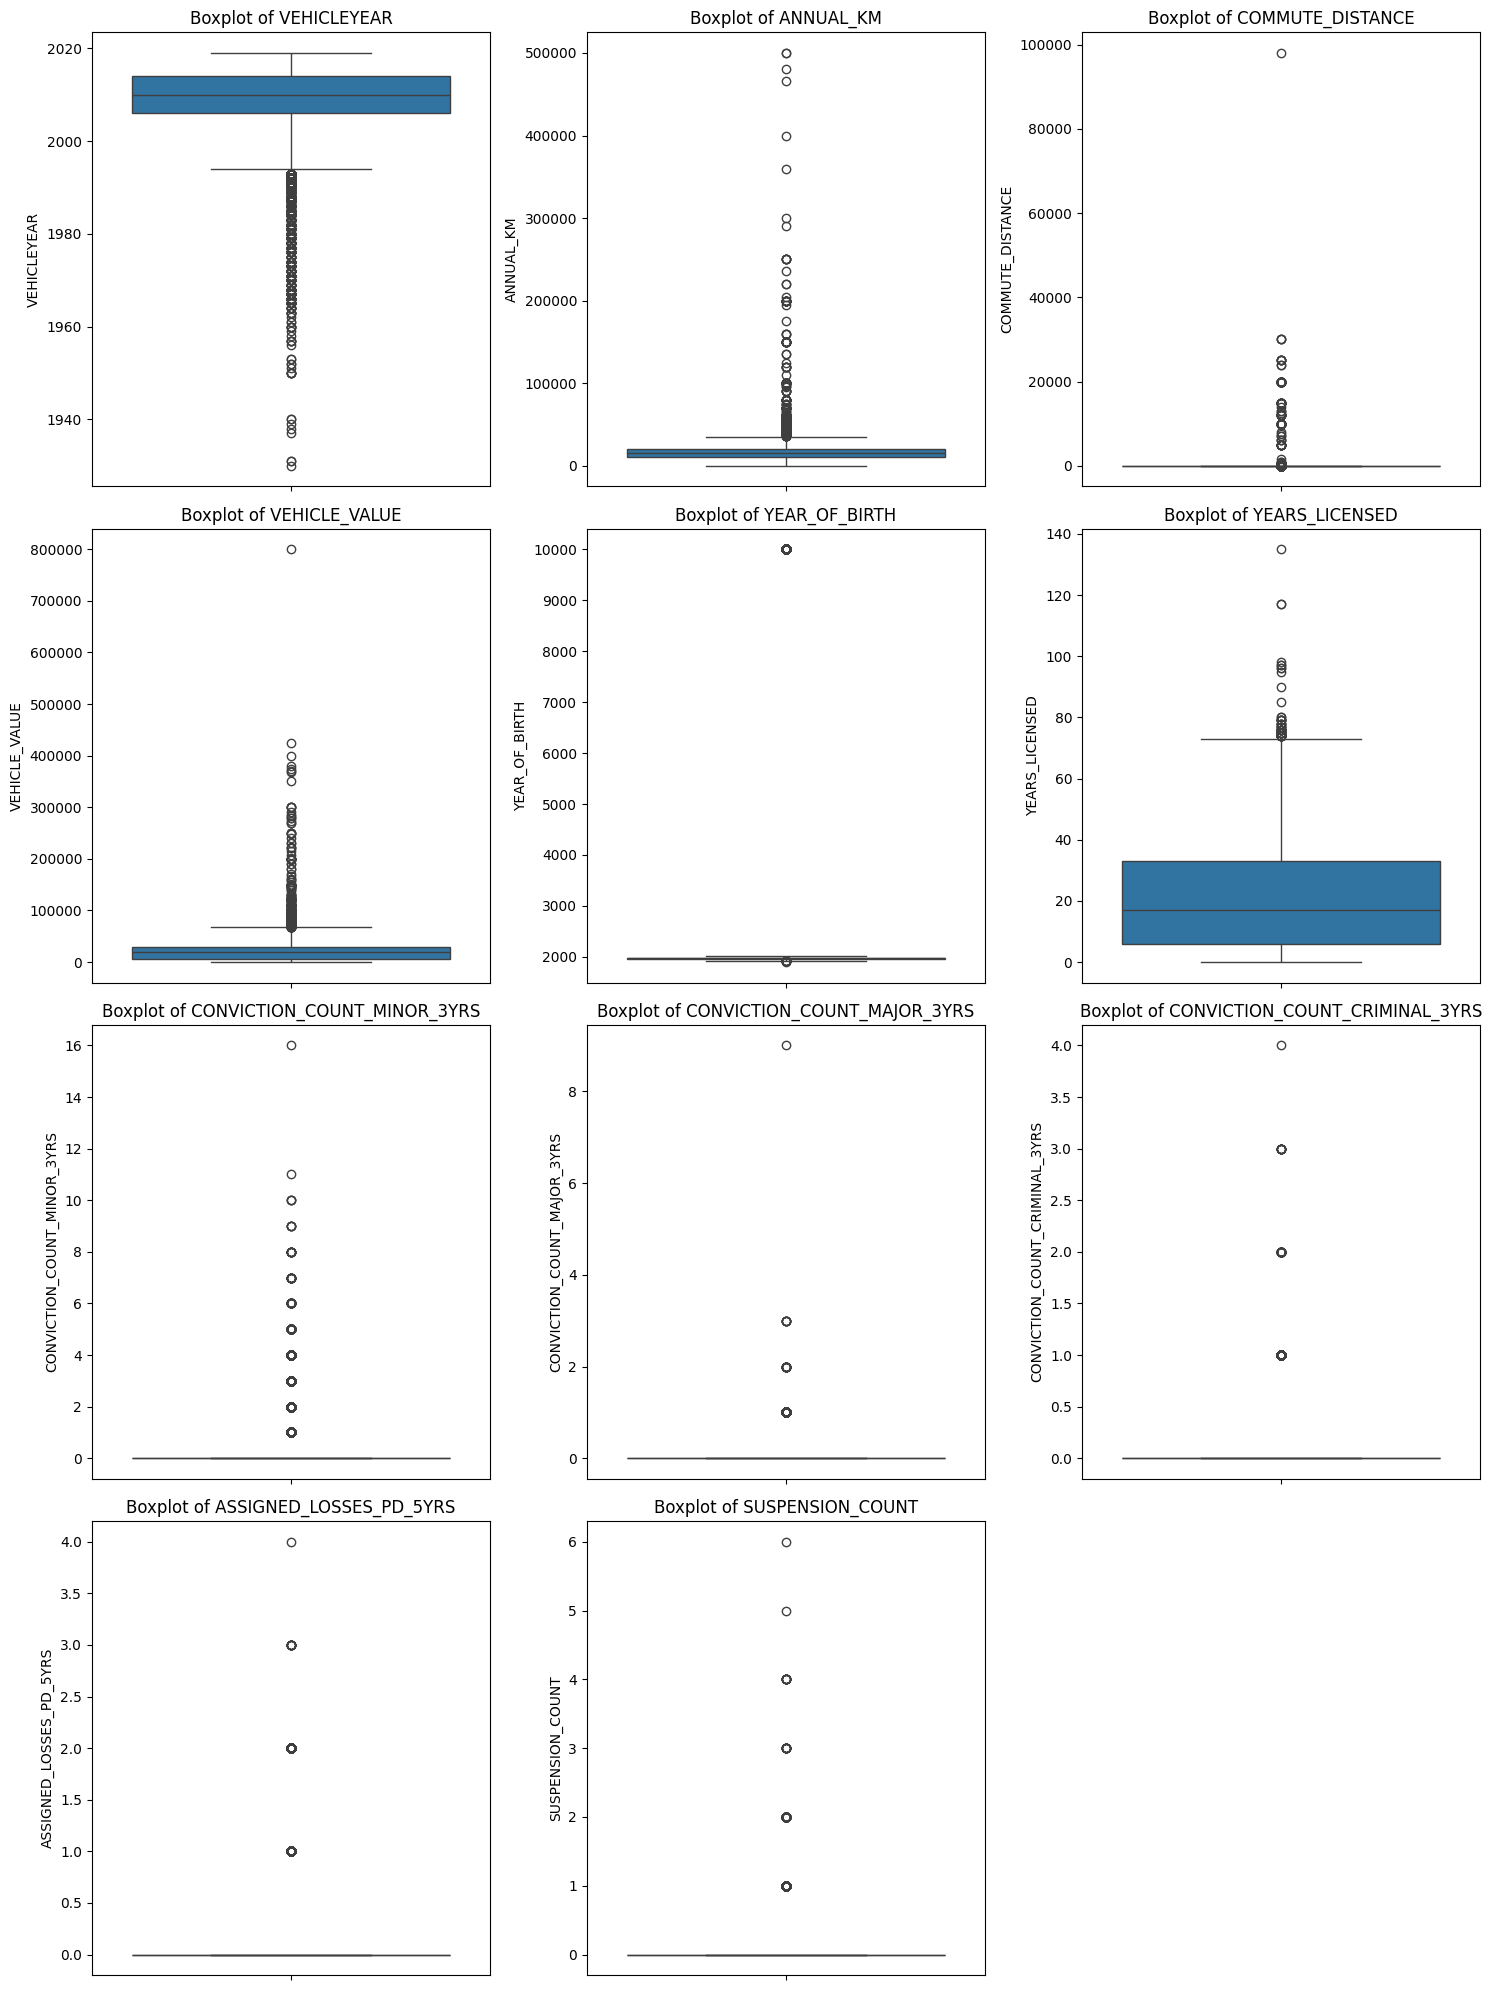

In [16]:
# Picking numerical Columns
num_cols = full_df.select_dtypes(include='number').columns
num_cols = num_cols[num_cols != 'IS_BOUND']

# Creating Subplots Grid

fig, axes = plt.subplots(nrows=(len(num_cols) // 3) + 1, ncols=3, figsize=(15, 5 * ((len(num_cols) // 3) + 1)))

# Flattening axes for easy iteration
axes = axes.flatten()

# plotting each numeric column against 'SalePrice'
for i, col in enumerate(num_cols):
    sns.boxplot(y =full_df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Hiding any extra subplots where numeric columns are not a multiple of 3
for i in range(len(num_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

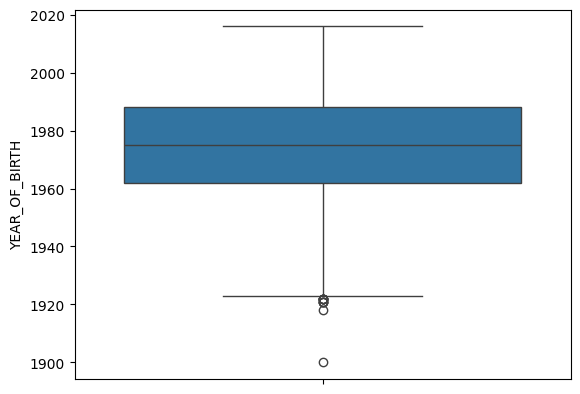

In [17]:
index_to_drop = full_df[full_df['YEAR_OF_BIRTH']==9999].index

# Dropping the abnormal points from the training data
full_df = full_df.drop(index_to_drop, axis=0)

# Plotting out the cleaned variable
sns.boxplot(y =full_df['YEAR_OF_BIRTH'], data=full_df);

In [18]:
# Indexing values to replace in years licensed
index_to_replace = full_df[full_df['YEARS_LICENSED']>=70].index

# values to replace years licensed above 70
yr_licensed_approx = 2016 - full_df.loc[index_to_replace, 'YEAR_OF_BIRTH'] + 18


# Replace specific values in a column
full_df.loc[index_to_replace, 'YEARS_LICENSED'] = yr_licensed_approx

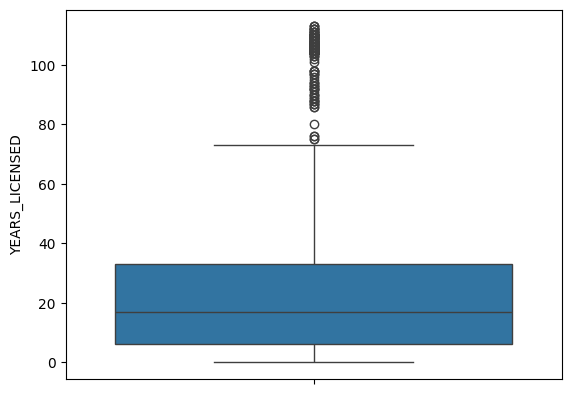

In [19]:
# Plotting out the cleaned variable
sns.boxplot(y =full_df['YEARS_LICENSED'], data=full_df);